In [ ]:
# 데이터 전처리용
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
!pip install konlpy
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
okt = Okt()

# 데이터 호출
import pandas as pd
import numpy as np

# 기계학습
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import os
import pickle
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')  # 경고메시지 숨기기

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import torch
import torch.nn as nn

from tensorflow import nn
from tensorflow import function, GradientTape, sqrt, abs, reduce_mean, ones_like, zeros_like, convert_to_tensor,float32
from tensorflow import data as tfdata
from tensorflow import config as tfconfig
from tensorflow.keras import Model, Sequential, Input
from tensorflow.keras.layers import GRU, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
!pip install transformers
from datetime import datetime
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from IPython.display import Image
from tqdm import tqdm, trange

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 5.1 MB/s 
     |████████████████████████████████| 7.6 MB 48.5 MB/s 
     |████████████████████████████████| 182 kB 68.3 MB/s 


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/플젝/보아즈감성분석/data.csv')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/플젝/보아즈감성분석/okt.csv')

In [ ]:
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
data.head()

,Unnamed: 0,date,close,diff,open,high,low,volume,updown,등락률,날짜,언론사,제목,링크
0,0,2021-11-01,87900.0,8100.0,81600.0,88600.0,77500.0,9173459.0,-0.071672,0.0,2021-11-01,매경이코노미,‘오딘 개발사’ 품었다…카카오게임즈 주가 10% 급등,https://www.mk.co.kr/economy/view/2021/1034761
1,1,2021-11-01,87900.0,8100.0,81600.0,88600.0,77500.0,9173459.0,-0.071672,0.0,2021-11-01,국민일보,"카카오게임즈, ‘오딘’ 개발사 품는다",http://news.kmib.co.kr/article/view.asp?arcid=...
2,2,2021-11-01,87900.0,8100.0,81600.0,88600.0,77500.0,9173459.0,-0.071672,0.0,2021-11-01,연합뉴스,"카카오게임즈, '오딘' 개발사 라이온하트 최대주주 된다(종합)",http://yna.kr/AKR20211101072551002?did=1195m
3,3,2021-11-01,87900.0,8100.0,81600.0,88600.0,77500.0,9173459.0,-0.071672,0.0,2021-11-01,조선비즈,"카카오게임즈, 2090억원 규모의 유상증자 결정",https://biz.chosun.com/stock/stock_general/202...
4,4,2021-11-01,87900.0,8100.0,81600.0,88600.0,77500.0,9173459.0,-0.071672,0.0,2021-11-01,한국경제TV,"""게임주 극성수기 온다""…기관은 카카오게임즈 `찜` [박해린의 뉴스&마켓]",https://www.wowtv.co.kr/NewsCenter/News/Read?a...


In [ ]:
df=data[['등락률','제목','updown']]

In [ ]:
df

,제목
0,오딘 개발 품다 카카오 게임 주가 급등
1,카카오 게임 오딘 개발 품다
2,카카오 게임 오딘 개발 라이온하트 최대 주주 되다 종합
3,카카오 게임 규모 유상증자 결정
4,게임 주 극성 수기 오다 기관 카카오 게임 찜 박해 린 뉴스 마켓
...,...
54915,나흘 대장정 마치다 지스타 안전하다 게임 문화 즐기다
54916,지스타 폐막 총 관람객 잠정 집계
54917,지스타 성황리 폐막 나흘 방문
54918,지스타 게임 뭉치다 살 지스타 성숙하다 게임 축제 거듭


In [ ]:
import os
import torch
# gpu 설정
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"    # gpu 할당 in jupyter
os.environ["CUDA_VISIBLE_DEVICES"]= "4"

device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [ ]:
X=df['제목']

In [ ]:
tokenizer.tokenize(X[0])

['오', '##딘', '개발', '품', '##다', '카카오', '게임', '주가', '급', '##등']

In [ ]:
outputs_list = []
for text in tqdm(X) :
    inputs = tokenizer(text, return_tensors='pt').to(device)
    output = model(**inputs)
    output = output.logits.tolist()[0]
    outputs_list.append(output)
#출력값
outputs = torch.tensor(outputs_list) 

100%|██████████| 54920/54920 [1:43:24<00:00,  8.85it/s]


In [ ]:
outputs

tensor([[-3.6149, -2.5250,  6.4303],
        [-1.1920,  1.2916, -0.0092],
        [-2.2760, -2.1224,  4.5535],
        ...,
        [ 3.4101,  0.3673, -3.8511],
        [-2.4964,  5.8977, -2.7415],
        [-3.0083,  6.7556, -3.2511]])

In [ ]:
# 확률값으로 변경
predictions=nn.softmax(outputs, -1)
#출력값 확인
df_sc = pd.DataFrame(predictions.numpy())
df_sc.columns = ['부정','중립','긍정']
df_sc

,부정,중립,긍정
0,0.000043,0.000129,0.999828
1,0.061545,0.737591,0.200864
2,0.001079,0.001258,0.997663
3,0.000058,0.999817,0.000125
4,0.563029,0.397754,0.039216
...,...,...,...
54915,0.000309,0.999597,0.000094
54916,0.000302,0.999623,0.000075
54917,0.953832,0.045498,0.000670
54918,0.000226,0.999597,0.000177


In [ ]:
df=df.rename(columns={'제목':'토큰'})

In [ ]:
df2 = pd.concat([data[['updown','등락률','제목']],df, df_sc], axis=1)
df2

,updown,등락률,제목,토큰,부정,중립,긍정
0,-0.071672,0.0,‘오딘 개발사’ 품었다…카카오게임즈 주가 10% 급등,오딘 개발 품다 카카오 게임 주가 급등,0.000043,0.000129,0.999828
1,-0.071672,0.0,"카카오게임즈, ‘오딘’ 개발사 품는다",카카오 게임 오딘 개발 품다,0.061545,0.737591,0.200864
2,-0.071672,0.0,"카카오게임즈, '오딘' 개발사 라이온하트 최대주주 된다(종합)",카카오 게임 오딘 개발 라이온하트 최대 주주 되다 종합,0.001079,0.001258,0.997663
3,-0.071672,0.0,"카카오게임즈, 2090억원 규모의 유상증자 결정",카카오 게임 규모 유상증자 결정,0.000058,0.999817,0.000125
4,-0.071672,0.0,"""게임주 극성수기 온다""…기관은 카카오게임즈 `찜` [박해린의 뉴스&마켓]",게임 주 극성 수기 오다 기관 카카오 게임 찜 박해 린 뉴스 마켓,0.563029,0.397754,0.039216
...,...,...,...,...,...,...,...
54915,0.002232,1.0,나흘간의 대장정 마친 '지스타 2022'...18만명이 안전하게 '게임문화' 즐겼다,나흘 대장정 마치다 지스타 안전하다 게임 문화 즐기다,0.000309,0.999597,0.000094
54916,0.002232,1.0,지스타 2022 폐막! 4일간 총 관람객 18만 4천여명으로 잠정 집계,지스타 폐막 총 관람객 잠정 집계,0.000302,0.999623,0.000075
54917,0.002232,1.0,'지스타 2022' 성황리 폐막…나흘간 18만명 방문,지스타 성황리 폐막 나흘 방문,0.953832,0.045498,0.000670
54918,0.002232,1.0,"[지스타]""게임으로 뭉쳤다""...18살 '지스타' 성숙한 게임 축제로 거듭나",지스타 게임 뭉치다 살 지스타 성숙하다 게임 축제 거듭,0.000226,0.999597,0.000177


In [ ]:
df2.to_csv('/content/drive/MyDrive/Colab Notebooks/플젝/보아즈감성분석/finberttoken.csv', index=False)

## 여기부터 새로

In [ ]:
import pandas as pd
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/플젝/보아즈감성분석/finberttoken.csv')
df_sc=df2[['부정','중립','긍정']]

In [ ]:
df_sc['감성']=df_sc.idxmax(1)
df_sc['감성수치']=df_sc.max(1)

<ipython-input-3-38a8a6d2529d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sc['감성']=df_sc.idxmax(1)
<ipython-input-3-38a8a6d2529d>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sc['감성수치']=df_sc.max(1)
<ipython-input-3-38a8a6d2529d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sc['감성수치']=df_sc.max(1)


In [ ]:
df_sc['감성'].value_counts()

중립    31555
긍정    15939
부정     7426
Name: 감성, dtype: int64

In [ ]:
df=pd.concat([df_sc['감성'],df2[['토큰','제목']]],axis=1)

In [ ]:
df

,감성,토큰,제목
0,긍정,오딘 개발 품다 카카오 게임 주가 급등,‘오딘 개발사’ 품었다…카카오게임즈 주가 10% 급등
1,중립,카카오 게임 오딘 개발 품다,"카카오게임즈, ‘오딘’ 개발사 품는다"
2,긍정,카카오 게임 오딘 개발 라이온하트 최대 주주 되다 종합,"카카오게임즈, '오딘' 개발사 라이온하트 최대주주 된다(종합)"
3,중립,카카오 게임 규모 유상증자 결정,"카카오게임즈, 2090억원 규모의 유상증자 결정"
4,부정,게임 주 극성 수기 오다 기관 카카오 게임 찜 박해 린 뉴스 마켓,"""게임주 극성수기 온다""…기관은 카카오게임즈 `찜` [박해린의 뉴스&마켓]"
...,...,...,...
54915,중립,나흘 대장정 마치다 지스타 안전하다 게임 문화 즐기다,나흘간의 대장정 마친 '지스타 2022'...18만명이 안전하게 '게임문화' 즐겼다
54916,중립,지스타 폐막 총 관람객 잠정 집계,지스타 2022 폐막! 4일간 총 관람객 18만 4천여명으로 잠정 집계
54917,부정,지스타 성황리 폐막 나흘 방문,'지스타 2022' 성황리 폐막…나흘간 18만명 방문
54918,중립,지스타 게임 뭉치다 살 지스타 성숙하다 게임 축제 거듭,"[지스타]""게임으로 뭉쳤다""...18살 '지스타' 성숙한 게임 축제로 거듭나"


# 2번째 : 단순 카운트 기반 감성 사전

In [ ]:
df2

,updown,등락률,제목,토큰,부정,중립,긍정
0,-0.071672,0.0,‘오딘 개발사’ 품었다…카카오게임즈 주가 10% 급등,오딘 개발 품다 카카오 게임 주가 급등,0.000043,0.000129,0.999828
1,-0.071672,0.0,"카카오게임즈, ‘오딘’ 개발사 품는다",카카오 게임 오딘 개발 품다,0.061545,0.737591,0.200864
2,-0.071672,0.0,"카카오게임즈, '오딘' 개발사 라이온하트 최대주주 된다(종합)",카카오 게임 오딘 개발 라이온하트 최대 주주 되다 종합,0.001079,0.001258,0.997663
3,-0.071672,0.0,"카카오게임즈, 2090억원 규모의 유상증자 결정",카카오 게임 규모 유상증자 결정,0.000058,0.999817,0.000125
4,-0.071672,0.0,"""게임주 극성수기 온다""…기관은 카카오게임즈 `찜` [박해린의 뉴스&마켓]",게임 주 극성 수기 오다 기관 카카오 게임 찜 박해 린 뉴스 마켓,0.563029,0.397754,0.039216
...,...,...,...,...,...,...,...
54915,0.002232,1.0,나흘간의 대장정 마친 '지스타 2022'...18만명이 안전하게 '게임문화' 즐겼다,나흘 대장정 마치다 지스타 안전하다 게임 문화 즐기다,0.000309,0.999597,0.000094
54916,0.002232,1.0,지스타 2022 폐막! 4일간 총 관람객 18만 4천여명으로 잠정 집계,지스타 폐막 총 관람객 잠정 집계,0.000302,0.999623,0.000075
54917,0.002232,1.0,'지스타 2022' 성황리 폐막…나흘간 18만명 방문,지스타 성황리 폐막 나흘 방문,0.953832,0.045498,0.000670
54918,0.002232,1.0,"[지스타]""게임으로 뭉쳤다""...18살 '지스타' 성숙한 게임 축제로 거듭나",지스타 게임 뭉치다 살 지스타 성숙하다 게임 축제 거듭,0.000226,0.999597,0.000177


In [ ]:
up = len(df2[df2['등락률'] == 1])
down = len(df2[df2['등락률'] == 0])
up_ratio = up / (up + down)
down_ratio = down / (up + down)

print('up_ratio : ', up_ratio)
print('down_ratio : ', down_ratio)

up_ratio :  0.5283867443554261
down_ratio :  0.4716132556445739


In [ ]:
# 등락률에 count 기반 감성
from sklearn.preprocessing import RobustScaler
vocab = {}

for nouns in tqdm(df2['토큰']) : 
    nouns = nouns.split(' ')
    
    for n in nouns :
        if n in vocab or len(n) <= 1 :
            pass
        else :
            vocab[n] = 0
    
print(len(vocab))
print(vocab)

for i, word in tqdm(enumerate(df2['토큰'])) :
    word = word.split(' ')
    
    for w in word :
        if df2.iloc[i]['등락률'] == 1 :
            if len(w) >= 2 :
                vocab[w] +=  down_ratio
        else :
            if len(w) >= 2 :
                vocab[w] -=  up_ratio

robustScaler = RobustScaler()

vocab_v = [v for v in vocab.values()]

scaled_list = robustScaler.fit_transform(np.array(vocab_v).reshape(-1, 1))

scaled_list = scaled_list.reshape(1,-1)

for idx, v in tqdm(enumerate(vocab_v)) :
    vocab_v[idx] = scaled_list[0][idx]

for i, k in tqdm(enumerate(vocab.keys())) :
    vocab[k] = vocab_v[i]

vocab

100%|██████████| 54920/54920 [00:00<00:00, 365566.57it/s]


9849
{'오딘': 0, '개발': 0, '품다': 0, '카카오': 0, '게임': 0, '주가': 0, '급등': 0, '라이온하트': 0, '최대': 0, '주주': 0, '되다': 0, '종합': 0, '규모': 0, '유상증자': 0, '결정': 0, '극성': 0, '수기': 0, '오다': 0, '기관': 0, '박해': 0, '뉴스': 0, '마켓': 0, '이유': 0, '국내': 0, '주식': 0, '유럽': 0, '인수': 0, '열사': 0, '추가': 0, '취득': 0, '바람': 0, '올라타다': 0, '게임빌': 0, '날다': 0, '강세': 0, '어비스': 0, '위메이드': 0, '어닝': 0, '서프라이즈': 0, '하다': 0, '코스피': 0, '위로': 0, '자회사': 0, '출자': 0, '크래프톤': 0, '편입': 0, '유력': 0, '확보': 0, '법인': 0, '스튜디오': 0, '계약': 0, '앞두다': 0, '밸류': 0, '프린세스': 0, '커넥트': 0, '신규': 0, '한정': 0, '캐릭터': 0, '무기': 0, '할로윈': 0, '업데이트': 0, '코스닥': 0, '월간': 0, '동향': 0, '투자자': 0, '집중': 0, '매수': 0, '오늘': 0, '공시': 0, '건설': 0, '금일': 0, '산업': 0, '기사': 0, '이다': 0, '평균': 0, '사고': 0, '보상': 0, '이용자': 0, '분통': 0, '회사': 0, '신작': 0, '잇다': 0, '모멘텀': 0, '특징': 0, '갤럭시': 0, '에스': 0, '종목': 0, '상한': 0, '브리핑': 0, '소식': 0, '마감': 0, '거래': 0, '상승': 0, '코앞': 0, '증시': 0, '훈풍': 0, '출발': 0, '인방': 0, '심상찮': 0, '상승세': 0, '휩쓸다': 0, '장마': 0, '주요': 0, '기업': 0, '지스타': 0, '부스': 0, '

54920it [00:59, 917.69it/s] 
9849it [00:00, 972244.58it/s]
9849it [00:00, 1108925.70it/s]


{'오딘': -182.9199112836249,
 '개발': -66.89182145827735,
 '품다': -21.183498752425773,
 '카카오': -1431.4670474078666,
 '게임': -223.03437759915192,
 '주가': -43.026027169391966,
 '급등': -119.76207374549635,
 '라이온하트': 68.88016634321914,
 '최대': -20.102367618519114,
 '주주': -24.625128915996406,
 '되다': -27.692575547546415,
 '종합': -4.856224008871138,
 '규모': 34.45121153313016,
 '유상증자': -4.390962018297756,
 '결정': -13.832592181868606,
 '극성': -0.2872303853617965,
 '수기': -2.9654227890213476,
 '오다': -8.593978375381047,
 '기관': 5.576146382030721,
 '박해': -0.35638480731910177,
 '뉴스': -3.199933462711404,
 '마켓': -101.45498197948521,
 '이유': 10.72303853617963,
 '국내': 119.73672303853404,
 '주식': -50.58267812586645,
 '유럽': -27.07976711948977,
 '인수': -92.59568616578936,
 '열사': -5.625128915996691,
 '추가': -79.53269753257574,
 '취득': -11.598425284169684,
 '바람': 18.148577765456047,
 '올라타다': -4.747346825616857,
 '게임빌': -1.404313834211255,
 '날다': -13.726121430551727,
 '강세': -48.22458552813923,
 '어비스': -7.609725533684601,
 '위메이드

In [ ]:
total = []

for i, word in tqdm(enumerate(df2['토큰'])) :
    word = word.split(' ')
    sent_score = 0
    
    for w in word :
        if len(w) >= 2 and w in vocab :
            sent_score += vocab[w]
    
    total.append(sent_score / len(word))

df2['sent_score'] = total
desc = df2['sent_score'].describe()
median = desc['50%']
df2['sent_label'] = 0

df2.loc[df2.query(f'sent_score >= {median}').index, 'sent_label'] = 1 
df2.head(3)

54920it [00:00, 150512.06it/s]


,updown,등락률,제목,토큰,부정,중립,긍정,sent_score,sent_label
0,-0.071672,0.0,‘오딘 개발사’ 품었다…카카오게임즈 주가 10% 급등,오딘 개발 품다 카카오 게임 주가 급등,0.000043,0.000129,0.999828,-298.326394,0
1,-0.071672,0.0,"카카오게임즈, ‘오딘’ 개발사 품는다",카카오 게임 오딘 개발 품다,0.061545,0.737591,0.200864,-385.099331,0
2,-0.071672,0.0,"카카오게임즈, '오딘' 개발사 라이온하트 최대주주 된다(종합)",카카오 게임 오딘 개발 라이온하트 최대 주주 되다 종합,0.001079,0.001258,0.997663,-212.523254,0


In [ ]:
df2['sent_score'].describe()

count    54920.000000
mean       -54.457463
std        165.316492
min      -1431.467047
25%       -179.413776
50%        -19.283127
75%         27.961565
max       1034.385426
Name: sent_score, dtype: float64

## 모델링 : bilstm

In [ ]:
df2[['토큰','sent_label','sent_score']].to_csv('countdata.csv')

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install konlpy
from konlpy.tag import *
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train, X_test, y_train, y_test = train_test_split(df2['토큰'], df2['sent_label'], test_size=0.3, random_state=777, stratify=df2['sent_label']) 
import warnings
warnings.filterwarnings('ignore')
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# 빈도 수가 낮은 단어 제거
threshold = 3

words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

for key, value in tqdm(tokenizer.word_counts.items()) :
    words_freq = words_freq + value

    if value < threshold :
        rare_cnt += 1
        rare_freq = rare_freq + value

print("전체 단어 수 :", words_cnt)
print("빈도가 {} 이하인 희귀 단어 수 : {}".format(threshold - 1, rare_cnt))
print("희귀 단어 비율 : {}".format((rare_cnt / words_cnt) * 100))
print("희귀 단어 등장 빈도 비율 : {}".format((rare_freq / words_freq) * 100))
vocab_size = words_cnt - rare_cnt + 2
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 9431/9431 [00:00<00:00, 639917.19it/s]


전체 단어 수 : 9431
빈도가 2 이하인 희귀 단어 수 : 4268
희귀 단어 비율 : 45.25501007316297
희귀 단어 등장 빈도 비율 : 1.6713242911175887


In [ ]:
max_len = max(len(i) for i in X_train)
print(max_len)

31


In [ ]:
# 패딩
X_train = pad_sequences(X_train, maxlen = max_len)
model = Sequential()

model.add(Embedding(vocab_size, 100))

model.add(Bidirectional(LSTM(100)))

model.add(Dense(1, activation = 'sigmoid'))

es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode = 'max', verbose = 2, save_best_only = True)

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(X_train, y_train, epochs = 15, callbacks = [es, mc], batch_size = 256, validation_split = 0.2)

loaded_model.evaluate(X_train, y_train)

Epoch 1/15
121/121 [==============================] - ETA: 0s - loss: 0.2160 - acc: 0.9164
Epoch 1: val_acc improved from -inf to 0.96658, saving model to best_model.h5
121/121 [==============================] - 43s 319ms/step - loss: 0.2160 - acc: 0.9164 - val_loss: 0.0935 - val_acc: 0.9666
Epoch 2/15
121/121 [==============================] - ETA: 0s - loss: 0.0546 - acc: 0.9800
Epoch 2: val_acc improved from 0.96658 to 0.97516, saving model to best_model.h5
121/121 [==============================] - 38s 315ms/step - loss: 0.0546 - acc: 0.9800 - val_loss: 0.0670 - val_acc: 0.9752
Epoch 3/15
121/121 [==============================] - ETA: 0s - loss: 0.0359 - acc: 0.9868
Epoch 3: val_acc improved from 0.97516 to 0.97724, saving model to best_model.h5
121/121 [==============================] - 40s 332ms/step - loss: 0.0359 - acc: 0.9868 - val_loss: 0.0621 - val_acc: 0.9772
Epoch 4/15
121/121 [==============================] - ETA: 0s - loss: 0.0266 - acc: 0.9900
Epoch 4: val_acc did not

NameError: ignored

In [ ]:
loaded_model = load_model('best_model.h5')
loaded_model.evaluate(X_train, y_train)

1202/1202 [==============================] - 20s 16ms/step - loss: 0.0279 - acc: 0.9897


[0.027948258444666862, 0.9896733164787292]

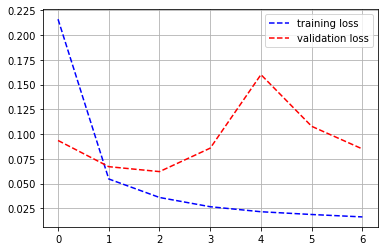

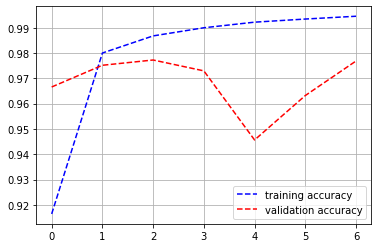

In [ ]:
# 시각화
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b--', label = 'training loss')
plt.plot(val_loss, 'r--', label = 'validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc, 'b--', label = 'training accuracy')
plt.plot(val_acc, 'r--', label = 'validation accuracy')
plt.legend()
plt.grid()

plt.show()


In [ ]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test=pad_sequences(X_test, maxlen = max_len)

(16476,)

In [ ]:
model.evaluate(X_test, y_test)

1202/1202 [==============================] - 20s 16ms/step - loss: 0.0230 - acc: 0.9935


[0.022990990430116653, 0.9934710264205933]

In [ ]:
# 데이터 전처리용
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
!pip install konlpy
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
okt = Okt()

def sentiment_predict(new_sentence) :
    
    new_token = okt.morphs(new_sentence)
    new_sequences = tokenizer.texts_to_sequences([new_token])
    new_pad = pad_sequences(new_sequences, maxlen = max_len)
    score = float(loaded_model.predict(new_pad))

    if score >= 0.5 :
        print("{} -> 긍정 ({:.2f}%)".format(new_sentence, score * 100))
    else :
        print("{} -> 부정 ({:.2f}%)".format(new_sentence, (1 - score) * 100))

sentiment_predict("[주간 추천주] 모멘텀 주목…카카오게임즈·SNT중공업 등 러브콜")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
1/1 [==============================] - 1s 839ms/step
[주간 추천주] 모멘텀 주목…카카오게임즈·SNT중공업 등 러브콜 -> 부정 (99.99%)


In [ ]:
sentiment_predict("카카오게임즈, ‘에버소울’ 출시 앞두고 게임내 정보 대 공개")

1/1 [==============================] - 0s 25ms/step
카카오게임즈, ‘에버소울’ 출시 앞두고 게임내 정보 대 공개 -> 부정 (99.99%)


# 워드투백

In [ ]:
tokenized_data = []
for sentence in X:
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    tokenized_data.append(tokenized_sentence)


In [ ]:
tokenized_data

[['오딘', '개발', '품다', '카카오', '게임', '주가', '급등'],
 ['카카오', '게임', '오딘', '개발', '품다'],
 ['카카오', '게임', '오딘', '개발', '라이온하트', '최대', '주주', '되다', '종합'],
 ['카카오', '게임', '규모', '유상증자', '결정'],
 ['게임', '주', '극성', '수기', '오다', '기관', '카카오', '게임', '찜', '박해', '린', '뉴스', '마켓'],
 ['카카오', '게임', '급등', '이유', '국내', '주식'],
 ['카카오', '게임', '유럽', '오딘', '개발', '분', '인수'],
 ['카카오', '게임', '계', '열사', '주식', '추가', '취득'],
 ['바람', '올라타다', '게임', '게임빌', '카카오', '게임', '날다'],
 ['게임', '주', '강세', '펄', '어비스', '카카오', '게임', '총', '위'],
 ['카카오', '게임', '위메이드', '어닝', '서프라이즈', '찜', '하다'],
 ['코스피', '선', '위로', '카카오', '게임'],
 ['카카오', '게임', '유럽', '자회사', '출자'],
 ['크래프톤', '카카오', '게임', '달', '편입', '유력'],
 ['카카오', '게임', '라이온하트', '분', '추가', '취득', '확보'],
 ['카카오', '게임', '유럽', '법인', '출자'],
 ['카카오', '게임', '오딘', '개발', '라이온하트', '스튜디오', '분', '인수', '계약'],
 ['카카오', '게임', '오딘', '개발', '품다', '라이온하트', '분', '인수'],
 ['카카오', '게임', '오딘', '개발', '라이온하트', '스튜디오', '인수'],
 ['오딘', '개발', '품다', '카카오', '게임', '편입', '앞두다', '밸류', '션'],
 ['카카오', '게임', '계', '열사', '카카오', '게임', '유럽'

In [ ]:
model2 = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0) #sg=1은 skip-gram
word = list(model2.wv.vocab)
print(word)

['오딘', '개발', '품다', '카카오', '게임', '주가', '급등', '라이온하트', '최대', '주주', '되다', '종합', '규모', '유상증자', '결정', '주', '수기', '오다', '기관', '찜', '박해', '린', '뉴스', '마켓', '이유', '국내', '주식', '유럽', '분', '인수', '계', '열사', '추가', '취득', '바람', '올라타다', '게임빌', '날다', '강세', '펄', '어비스', '총', '위', '위메이드', '어닝', '서프라이즈', '하다', '코스피', '선', '위로', '자회사', '출자', '크래프톤', '달', '편입', '유력', '확보', '법인', '스튜디오', '계약', '앞두다', '밸류', '션', '원', '프린세스', '커넥트', '신규', '한정', '캐릭터', '츠', '무기', '할로윈', '업데이트', '코스닥', '월간', '동향', '투자자', '집중', '매수', '오늘', '공시', '건설', '금일', '산업', '기사', '이다', '평균', '사고', '보상', '안', '이용자', '분통', '종', '회사', '신작', '줄', '잇다', '모멘텀', '특징', '갤럭시', '에스', '엠', '개', '종목', '상한', '브리핑', '소식', '마감', '거래', '상승', '코앞', '증시', '훈풍', '출발', '인방', '심상', '상승세', '도', '휩쓸다', '장마', '감', '후', '주요', '장', '중', '기업', '지스타', '부스', '배치도', '공개', '대형', '마련', '살다', '단독', '공매도', '때리다', '외국', '큰손', '증권', '업계', '지오', '리먼', '트', '공모', '확정', '외국인', '지난달', '삼성', '매도', '금주', '쟁점', '실적', '발표', '시즌', '돌입', '식초', '고수', '지금', '가상', '화폐', '초', '카겜', '비', '덴트'

In [ ]:
print(model2.wv.most_similar("게임"))

[('아크', 0.6550166010856628), ('던파', 0.6242853403091431), ('캣', 0.6189485788345337), ('뉴투', 0.5817824602127075), ('작', 0.5677621364593506), ('답', 0.5648732781410217), ('대작', 0.5621854066848755), ('퍼즐게임', 0.5600489377975464), ('던전앤파이터', 0.5544984340667725), ('미르', 0.5536721348762512)]


가장 단순한 방법으로는 문장에 있는 모든 단어의 벡터값에 대해 평균을 내서 리뷰 하나당 하나의 벡터로 만드는 방법이 있다. 하나의 리뷰에 전체 단어의 평균값을 계산하는 함수를 구현

- words : 단어의 모음인 하나의 리뷰가 들어감
- model : word2vec 모델을 넣는 곳이며, 우리가 학습한 word2vec 모델이 들어감
- num_features : word2vec으로 임베딩할 때 정한 벡터의 차원 수

In [ ]:
def get_features(words, model, num_features):
    # 출력 벡터 초기화
    feature_vector=np.zeros((num_features), dtype=np.float32)
    
    num_words=0
    # 어휘사전 준비
    index2word_set=set(model.wv.index2word)
    
    for w in words:
        if w in index2word_set:
            num_words+=1
            # 사전에 해당하는 단어에 대해 단어 벡터를 더함
            feature_vector=np.add(feature_vector, model[w])
    
    # 문장의 단어 수만큼 나누어 단어 벡터의 평균값을 문장 벡터로 함
    feature_vector=np.divide(feature_vector, num_words)
    return feature_vector

    '''하나의 벡터를 만드는 속도를 빠르게 하기 위해 np.zeros로 미리 모두 0의 값을 가지는 벡터를 만들고, 
    문장의 단어가 해당 모델 단어사전에 속하는지 보기 위해 model.wv.index2word를 set 객체로 생성해서 index2word_set 변수에 할당한다. 
    그리고 반복문으로 리뷰를 구성하는 단어에 대해 임베딩된 벡터가 있는 단어 벡터의 합을 구한다. 마지막으로 사용한 단어의 전체 개수로 나눠 평균 벡터의 값을 구함.'''

정의한 함수를 사용해 전체 리뷰에 대해 각 리뷰의 평균 벡터를 구하는 함수를 정의
- reviews : 학습 데이터인 전체 리뷰 데이터를 입력
- model : word2vec 모델 입력 단자
- num_features : word2vec으로 임베딩할 때 정한 벡터의 차원 수

In [ ]:
def get_dataset(reviews, model, num_features):
    dataset=list()
    
    for s in reviews:
        dataset.append(get_features(s, model, num_features))
    
    reviewFeatureVecs=np.stack(dataset)
    
    return reviewFeatureVecs

In [ ]:
test_data_vecs=get_dataset(tokenized_data, model2, 100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

model_nb = MultinomialNB(alpha=1.0) # 나이브베이즈 알고리즘 기반의 분류기 생성
model_svm = SVC(kernel='linear')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(test_data_vecs, df['등락률'], test_size=0.3) # 데이터를 학습:테스트 = 7:3 비율로 나눔

from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


model_nb.fit(x_train, y_train)

y_pred_nb = model_nb.predict(x_test)

acc_nv = accuracy_score(y_test, y_pred_nb)

print("Accuracy score of Naive Bayes:", acc_nv)

Accuracy score of Naive Bayes: 0.5912842923039573


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(test_data_vecs, df['등락률'], test_size=0.3) # 데이터를 학습:테스트 = 7:3 비율로 나눔
model_svm.fit(x_train, y_train)

y_pred_svm = model_svm.predict(x_test)

acc_svm = accuracy_score(y_test, y_pred_svm)

print("Accuracy score of Naive Bayes:", acc_svm)

Accuracy score of Naive Bayes: 0.6480941976207818


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(random_state=42)
forest.fit(x_train, y_train)
y_pred_rf = forest.predict(x_test)

rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy score of RandomForest:", rf)

Accuracy score of RandomForest: 0.7707574654042243


In [ ]:
from sklearn.model_selection import train_test_split

X=test_data_vecs
y=np.array(df['등락률'])

RANDOM_SEED=42
TEST_SPLIT=0.2

X_train, X_eval, y_train, y_eval=train_test_split(X, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)
from sklearn.linear_model import LogisticRegression

lgs=LogisticRegression(class_weight='balanced')
lgs.fit(X_train, y_train)
# 검증 데이터로 성능 측정
print("Accuracy: %f" % lgs.score(X_eval, y_eval))

Accuracy: 0.634195


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


참고 

https://yanoo.tistory.com/30

In [ ]:
len(x_train)

38444

### 기본 TFIDF보다 성능이 낮은 이유 
벡터를 평균화하여 사용하면 단어 순서가 없어서 BoW기법의 개념과 매우 유사해진다.
또한 훨씬 많은 텍스트로 학습을 해야한다. 구글에서는 10억개 이상의 단어 말뭉치를 기반으로 하지만 학습데이터는 약 4만개의 단어 밖에 되지 않는다.

해결방안으로는 구글에서 사전훈련된 모델을 로드해서 사용해보기. 
단어 벡터말고 문장 벡터 사용하기.

구글에 사전훈련된 word2vec 

In [ ]:

#- 더이상 지원이 안되나봄, 주소 에러뜸
# 구글의 사전 훈련된 Word2Vec 모델을 로드.
urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

FileNotFoundError: ignored

# 다른 거


In [ ]:
df

,감성,토큰,제목
0,긍정,오딘 개발 품다 카카오 게임 주가 급등,‘오딘 개발사’ 품었다…카카오게임즈 주가 10% 급등
1,중립,카카오 게임 오딘 개발 품다,"카카오게임즈, ‘오딘’ 개발사 품는다"
2,긍정,카카오 게임 오딘 개발 라이온하트 최대 주주 되다 종합,"카카오게임즈, '오딘' 개발사 라이온하트 최대주주 된다(종합)"
3,중립,카카오 게임 규모 유상증자 결정,"카카오게임즈, 2090억원 규모의 유상증자 결정"
4,부정,게임 주 극성 수기 오다 기관 카카오 게임 찜 박해 린 뉴스 마켓,"""게임주 극성수기 온다""…기관은 카카오게임즈 `찜` [박해린의 뉴스&마켓]"
...,...,...,...
54915,중립,나흘 대장정 마치다 지스타 안전하다 게임 문화 즐기다,나흘간의 대장정 마친 '지스타 2022'...18만명이 안전하게 '게임문화' 즐겼다
54916,중립,지스타 폐막 총 관람객 잠정 집계,지스타 2022 폐막! 4일간 총 관람객 18만 4천여명으로 잠정 집계
54917,부정,지스타 성황리 폐막 나흘 방문,'지스타 2022' 성황리 폐막…나흘간 18만명 방문
54918,중립,지스타 게임 뭉치다 살 지스타 성숙하다 게임 축제 거듭,"[지스타]""게임으로 뭉쳤다""...18살 '지스타' 성숙한 게임 축제로 거듭나"


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/플젝/보아즈감성분석/KakaoGames_Dataset.csv', encoding='CP949')

In [ ]:
data

,Column1,"긍정2, 중립1, 부정 0",제목
0,0,NaN,‘오딘 개발사’ 품었다…카카오게임즈 주가 10% 급등
1,1,NaN,"카카오게임즈, ‘오딘’ 개발사 품는다"
2,2,NaN,"카카오게임즈, '오딘' 개발사 라이온하트 최대주주 된다(종합)"
3,3,NaN,"카카오게임즈, 2090억원 규모의 유상증자 결정"
4,4,NaN,"""게임주 극성수기 온다""…기관은 카카오게임즈 `찜` [박해린의 뉴스&마켓]"
...,...,...,...
36879,54914,NaN,"18만명 찾았다…지스타 2022, ‘사고 없이 성공적 마무리’"
36880,54915,NaN,나흘간의 대장정 마친 '지스타 2022'...18만명이 안전하게 '게임문화' 즐겼다?
36881,54916,NaN,지스타 2022 폐막! 4일간 총 관람객 18만 4천여명으로 잠정 집계
36882,54917,NaN,'지스타 2022' 성황리 폐막…나흘간 18만명 방문


In [ ]:
data=pd.concat([data['긍정2, 중립1, 부정 0'], dd],axis=1)

In [ ]:
dd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/플젝/보아즈감성분석/akak.csv', encoding='CP949')

In [ ]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/플젝/보아즈감성분석/labeling.csv')